# Zadanie domowe 6 – EDA dla filmów animowanych z TMDB


a)

Celem pracy jest przeprowadzenie eksploracyjnej analizy danych (EDA) dla zbioru zawierającego szczegółowe informacje o około 52 000 filmach animowanych. Analiza ma na celu zidentyfikowanie głównych trendów, rozkładów oraz zależności występujących w danych. Zbiór danych został pozyskany poprzez API TMDB (The Movie Database) i stanowi podzbiór większego zestawu "Full TMDB Movies Dataset 2024". Zawiera tylko filmy animowane i obejmuje różne dane powiązane z tym gatunkiem.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dane = pd.read_csv("Animation_Movies.csv") #wczytujemy dane

In [13]:
print(f"Liczba wierszy: {dane.shape[0]} i liczba kolumn: {dane.shape[1]}") #rozmiar danych

print("\nTypy zmiennych:\n") 
print(dane.dtypes.value_counts())  #typy zmiennych

na = dane.isnull().sum()
na_procent = (na / len(dane)) * 100

df = pd.DataFrame({
    'Liczba braków danych': na,
    'Procent braków danych': na_procent
}).sort_values(by='Liczba braków danych', ascending=False)

print(df) #wartosci na

Liczba wierszy: 51945 i liczba kolumn: 23

Typy zmiennych:

object     15
int64       5
float64     2
bool        1
Name: count, dtype: int64
                      Liczba braków danych  Procent braków danych
tagline                              47267              90.994321
homepage                             43692              84.112042
backdrop_path                        36110              69.515834
production_companies                 22547              43.405525
imdb_id                              22393              43.109058
spoken_languages                     18127              34.896525
poster_path                          14011              26.972760
production_countries                 12245              23.573010
overview                              6079              11.702763
release_date                          2137               4.113967
original_title                           1               0.001925
title                                    1               0.001925


Zbiór danych zawiera wiele różnych cech (23 kolumny) i około 52 tyś reordów. Większość kolumn ma typ `object` (zazwyczaj są to dane kategoryczne). Występuje również duża liczba braków danych – na przykład w kolumnach `tagline` oraz `homepage` brakuje danych w ponad **80%** przypadków.


b)

In [14]:
numeryczne = dane[dane.columns].select_dtypes(include=['number'])
kategoryczne = dane[dane.columns].select_dtypes(include=['object','bool'])

In [15]:
print("Statystyki numeryczne:")
print(numeryczne.describe().T.round(2))

Statystyki numeryczne:
                count        mean          std   min       25%       50%  \
id            51945.0   618812.16    347974.79  12.0  330081.0  611915.0   
vote_average  51945.0        2.60         3.32   0.0       0.0       0.0   
vote_count    51945.0       40.40       482.71   0.0       0.0       0.0   
revenue       51945.0  1863464.11  30498240.44   0.0       0.0       0.0   
runtime       51945.0       20.90        39.02   0.0       3.0       7.0   
budget        51945.0   575951.29   7606627.80   0.0       0.0       0.0   
popularity    51945.0        1.89         9.70   0.0       0.6       0.6   

                    75%           max  
id            915904.00  1.238314e+06  
vote_average       6.00  1.000000e+01  
vote_count         2.00  1.946300e+04  
revenue            0.00  1.450027e+09  
runtime           19.00  3.720000e+03  
budget             0.00  2.600000e+08  
popularity         0.88  1.008940e+03  


In [16]:
print("\n Statystyki kategoryczne:")

n = dane.shape[0]

kategoryczne_statystyki = kategoryczne.describe().T.round(2)
kategoryczne_statystyki["% top"] = (kategoryczne_statystyki["freq"] / n * 100).round(2)

print(kategoryczne_statystyki)



 Statystyki kategoryczne:
                      count unique                               top   freq  \
title                 51944  49381            Little Red Riding Hood     15   
status                51945      6                          Released  51134   
release_date          49808  16893                        2017-01-01    291   
adult                 51945      2                             False  51719   
backdrop_path         15835  15731  /7tFOLDhZqKPactVlGfdjgVmYnlu.jpg     17   
homepage               8253   7461    https://animation.geidai.ac.jp    147   
imdb_id               29552  29545                        tt26900526      2   
original_language     51945    102                                en  28584   
original_title        51944  50318                        Cinderella      9   
overview              45866  44907   An Aesop’s Film Fables cartoon.     71   
poster_path           37934  37819  /tVRb7CCGuru9RdG1ikGFCceuegy.jpg     12   
tagline                46

75% filmów nie przekracza długości 19 minut, średni budżet wydany na film to około 576 tys USD. Najczęstszym językiem mówionym w produkcjach jest angielski (około 23% wszystkich danych) i większość produkcji powstała w USA (około 24%).

c)

In [17]:
#grupujemy średnią popularność względem originalnego języka filmu 
grupa1 = dane.groupby('original_language').popularity.mean().reset_index(name = 'srednia').sort_values('srednia', ascending = False).round(2)

#grupujemy średnią ocenę i czas filmu względem tego czy jest odpowiedni dla dorosłych
grupa2 = dane.groupby("adult")[["vote_average", "runtime"]].agg(["mean", "std"]).reset_index().round(2)

print(grupa1)
print(grupa2)


    original_language  srednia
43                 ja     4.17
90                 th     2.23
21                 en     2.01
11                 ca     1.86
101                zu     1.76
..                ...      ...
77                 se     0.60
96                 uz     0.60
6                  be     0.57
45                 ka     0.51
60                 mr     0.00

[102 rows x 2 columns]
   adult vote_average       runtime       
                 mean   std    mean    std
0  False         2.60  3.32   20.88  39.05
1   True         1.87  3.01   26.75  28.30


Filmy w języku originalnym japońskim mają średnio największą popularność (następne są w języku tajskim i angielskim). Filmy oznaczone jako odpowiednie dla dorosłych są mniej popularne w ocenach użytkowników oraz dłuższe niż filmy bez tego oznakowania. Zróżnicowanie oceny i czasu trwania jest większa dla filmów nie przeznaczonych dla dorosłych.


d)

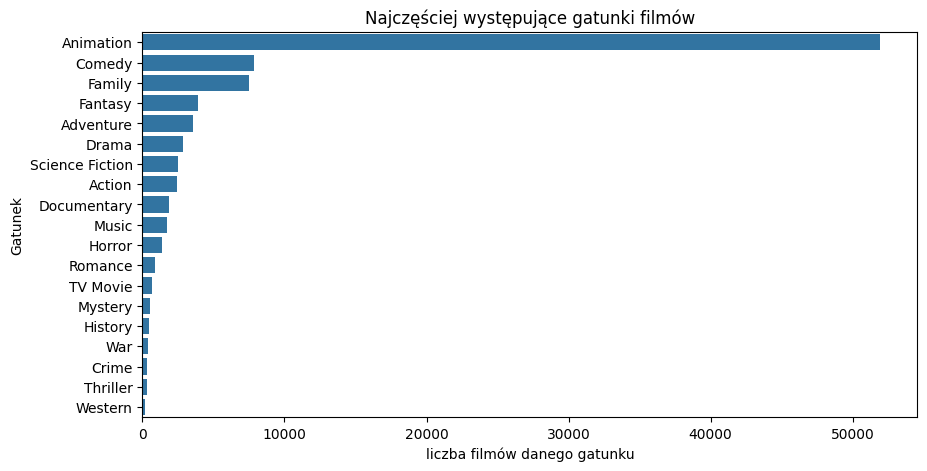

In [18]:

genres = dane['genres'].dropna().str.split(',')
genres = genres.explode().str.strip()
genre_liczba = genres.value_counts().reset_index(name = 'licznosc')

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_liczba, x="licznosc", y="genres")
plt.title("Najczęściej występujące gatunki filmów")
plt.xlabel("liczba filmów danego gatunku")
plt.ylabel("Gatunek")

plt.show()


Oczywiście ramka dotyczy filmów animowanych. Najczęściej występującymi gatunkami są komedie, rodzinne i fantasy. Najmniej liczne są kryminalne, Thrillery i Westerny.

e)

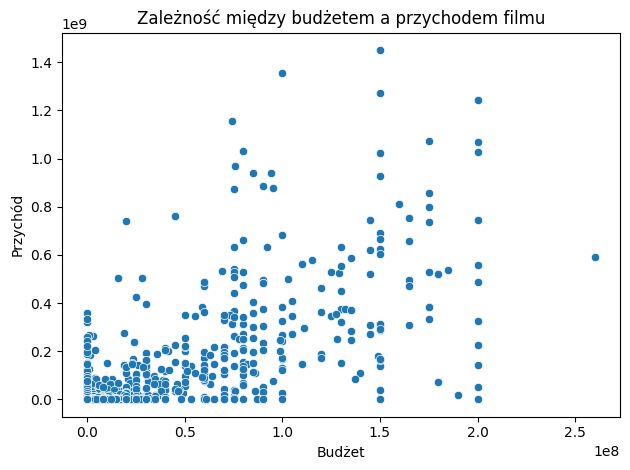

In [19]:
sns.scatterplot(data=dane, x='budget', y='revenue')

plt.title("Zależność między budżetem a przychodem filmu")
plt.xlabel("Budżet")
plt.ylabel("Przychód")
plt.tight_layout()
plt.show()


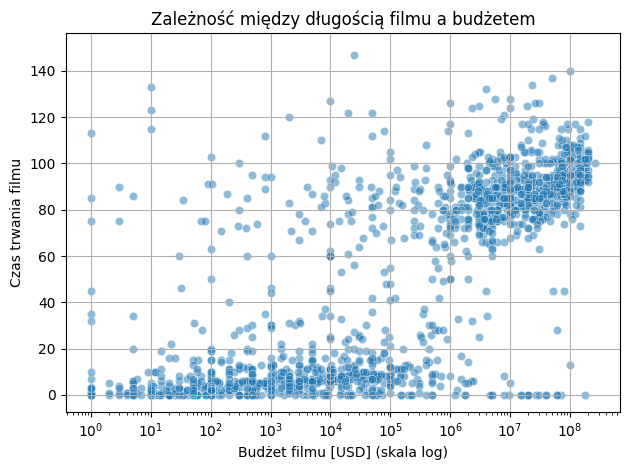

In [20]:
df_pom = dane[dane['runtime'] < 150]

sns.scatterplot(data=df_pom, x='budget', y='runtime', alpha=0.5)
plt.xscale('log')  
plt.title("Zależność między długością filmu a budżetem")
plt.xlabel("Budżet filmu [USD] (skala log)")
plt.ylabel("Czas trwania filmu")
plt.grid(True)
plt.tight_layout()
plt.show()



Jasno widać, że filmy z niskim budżetem generują zazwyczaj niski przychód, natomiast wraz ze wzrostem budżetu rośnie również potencjał przychodowy.
Czas trwania filmów także wykazuje interesującą zależność od budżetu — dla filmów o budżecie do około 10⁶ USD długość zwykle nie przekracza 20 minut. Natomiast powyżej tej kwoty większość produkcji trwa co najmniej 60 minut.